In [1]:
import pickle
from Map2Graphs import HOGS2
from Map2Graphs.ShowGraphs import show_graph_pyvis,show_graph_pyvis_big_nodes

 Graph edit distance 4.0
FDG files to:  C:/Users/HP/Python/AntlerProject/JavaGraphGeneration/Map2Graphs/FDG/


In [ ]:
with open('java_graphs_total.pkl', 'rb',False) as f:
    graphs = pickle.load(f)
show_graph_pyvis(graphs[1350],output_filename='graph1.html')
print(HOGS2.MultiDiGraphMatcher(graphs[1],graphs[2]))

In [17]:
with open('java_graphs1.pkl','rb') as f1:
    graphs1=pickle.load(f1)
length=len(graphs1)
with open('java_graphs_two_comparison.pkl', 'rb',False) as f:
    graphs = pickle.load(f)
show_graph_pyvis(graphs[2],output_filename='graph.html')

C:/Users/HP/Python/AntlerProject/JavaGraphGeneration/Map2Graphs/FDG/MyGraph Z.html


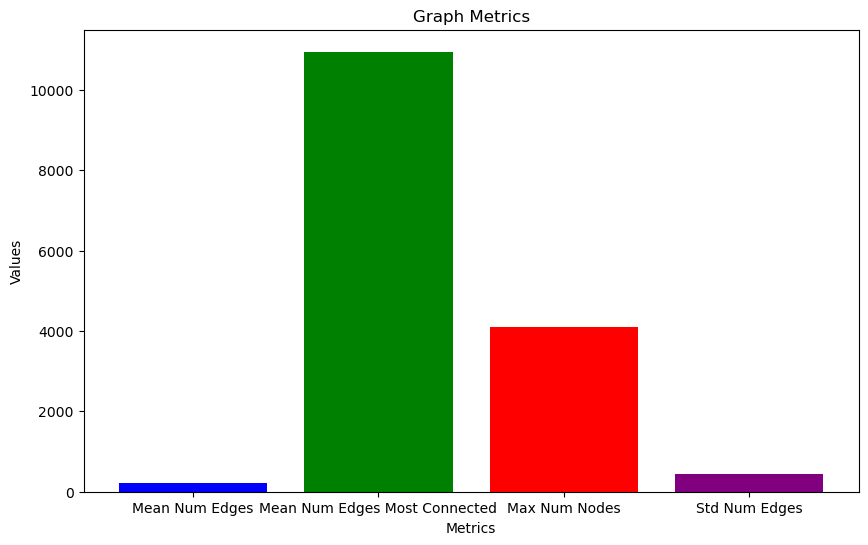

In [18]:
import pickle
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Load the list of graphs from the file
with open('java_graphs_total.pkl', 'rb') as f:
    graphs = pickle.load(f)

# Initialize lists to store metrics
num_edges_list = []
num_nodes_list = []

# Calculate metrics for each graph
for graph in graphs:
    num_edges = graph.number_of_edges()
    num_nodes = graph.number_of_nodes()
    num_edges_list.append(num_edges)
    num_nodes_list.append(num_nodes)

# Calculate required metrics
mean_num_edges = np.mean(num_edges_list)
mean_num_edges_most_connected = np.mean(sorted(num_edges_list, reverse=True)[:1])  # The most connected graph
max_num_nodes = np.max(num_nodes_list)
std_num_edges = np.std(num_edges_list)

# Plotting the metrics
metrics = ['Mean Num Edges', 'Mean Num Edges Most Connected', 'Max Num Nodes', 'Std Num Edges']
values = [mean_num_edges, mean_num_edges_most_connected, max_num_nodes, std_num_edges]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Graph Metrics')
plt.show()


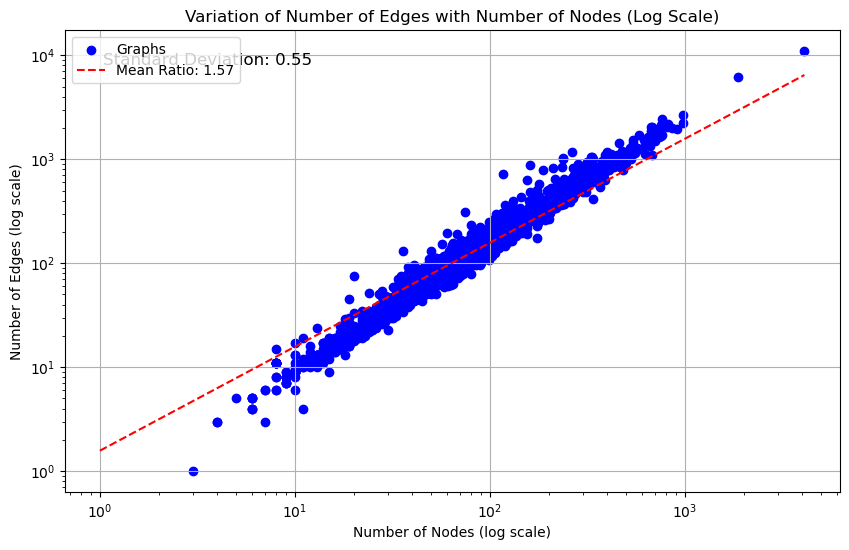

In [19]:
import pickle
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Load the list of graphs from the file
with open('java_graphs_total.pkl', 'rb') as f:
    graphs = pickle.load(f)

# Initialize lists to store metrics
num_edges_list = []
num_nodes_list = []

# Calculate the number of edges and nodes for each graph
for graph in graphs:
    num_edges = graph.number_of_edges()
    num_nodes = graph.number_of_nodes()
    num_edges_list.append(num_edges)
    num_nodes_list.append(num_nodes)

# Calculate the mean ratio of number of edges to number of nodes
ratios = [edges / nodes if nodes > 0 else 0 for edges, nodes in zip(num_edges_list, num_nodes_list)]
mean_ratio = sum(ratios) / len(ratios) if len(ratios) > 0 else 0

# Calculate the standard deviation of the ratios
std_dev = np.std(ratios)

# Create scatter plot with logarithmic scale
plt.figure(figsize=(10, 6))
plt.scatter(num_nodes_list, num_edges_list, color='b', label='Graphs')
plt.xscale('log')
plt.yscale('log')

# Plot the mean ratio as a line
max_nodes = max(num_nodes_list) if num_nodes_list else 1
mean_line_x = np.logspace(0, np.log10(max_nodes), num=100)
mean_line_y = mean_ratio * mean_line_x
plt.plot(mean_line_x, mean_line_y, color='r', linestyle='--', label=f'Mean Ratio: {mean_ratio:.2f}')

# Add standard deviation text to the plot
plt.text(0.05, 0.95, f'Standard Deviation: {std_dev:.2f}', transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top')

plt.xlabel('Number of Nodes (log scale)')
plt.ylabel('Number of Edges (log scale)')
plt.title('Variation of Number of Edges with Number of Nodes (Log Scale)')
plt.legend()
plt.grid(True)
plt.show()


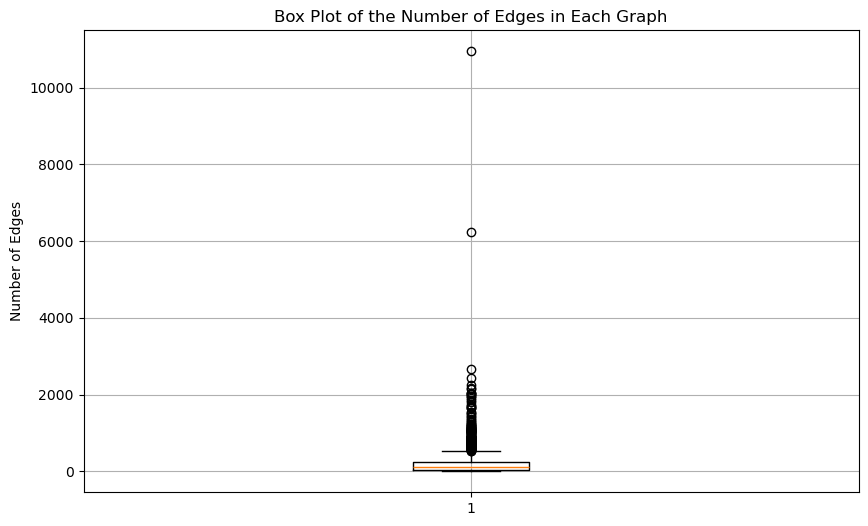

In [20]:
import pickle
import networkx as nx
import matplotlib.pyplot as plt

# Load the list of graphs from the file
with open('java_graphs_total.pkl', 'rb') as f:
    graphs = pickle.load(f)

# Initialize a list to store the number of edges in each graph
num_edges_list = []

# Calculate the number of edges for each graph
for graph in graphs:
    num_edges = graph.number_of_edges()
    num_edges_list.append(num_edges)

# Plotting the box plot for the number of edges
plt.figure(figsize=(10, 6))
plt.boxplot(num_edges_list)
plt.ylabel('Number of Edges')
plt.title('Box Plot of the Number of Edges in Each Graph')
plt.grid(True)
plt.show()


In [21]:
from Map2Graphs.ShowGraphs import show_graph,show_graph_pyvis

with open('java_graphs_total.pkl', 'rb') as f:
    graphs = pickle.load(f)

show_graph_pyvis(graphs[0])

C:/Users/HP/Python/AntlerProject/JavaGraphGeneration/Map2Graphs/FDG/MyGraph Z.html


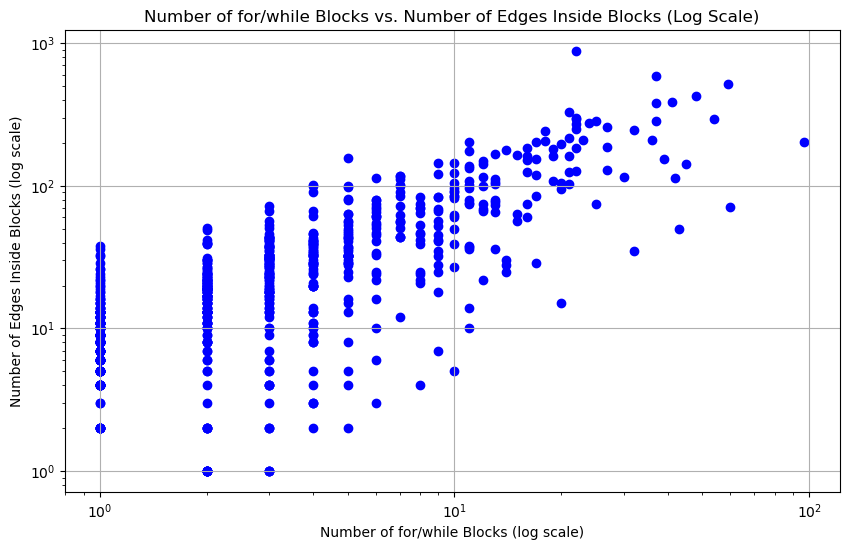

In [22]:
import pickle
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Load the list of graphs from the file
with open('java_graphs_total.pkl', 'rb') as f:
    graphs = pickle.load(f)

# Initialize lists to store the counts
block_counts = []
edges_in_blocks_counts = []

# Define the block types
block_types = ['for', 'while']

# Process each graph
for graph in graphs:
    block_count = 0
    edges_in_blocks_count = 0
    
    # Iterate through nodes to count for and while blocks
    for node in graph.nodes():
        node_data = graph.nodes[node]
        node_label = node_data.get('label', '')
        if any(block_type in node_label for block_type in block_types):
            block_count += 1
            # Count edges inside this block
            edges_in_blocks_count += len(list(graph.edges(node)))

    block_counts.append(block_count)
    edges_in_blocks_counts.append(edges_in_blocks_count)

# Create scatter plot with logarithmic scale
plt.figure(figsize=(10, 6))
plt.scatter(block_counts, edges_in_blocks_counts, color='b', marker='o')
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Number of for/while Blocks (log scale)')
plt.ylabel('Number of Edges Inside Blocks (log scale)')
plt.title('Number of for/while Blocks vs. Number of Edges Inside Blocks (Log Scale)')
plt.grid(True)
plt.show()


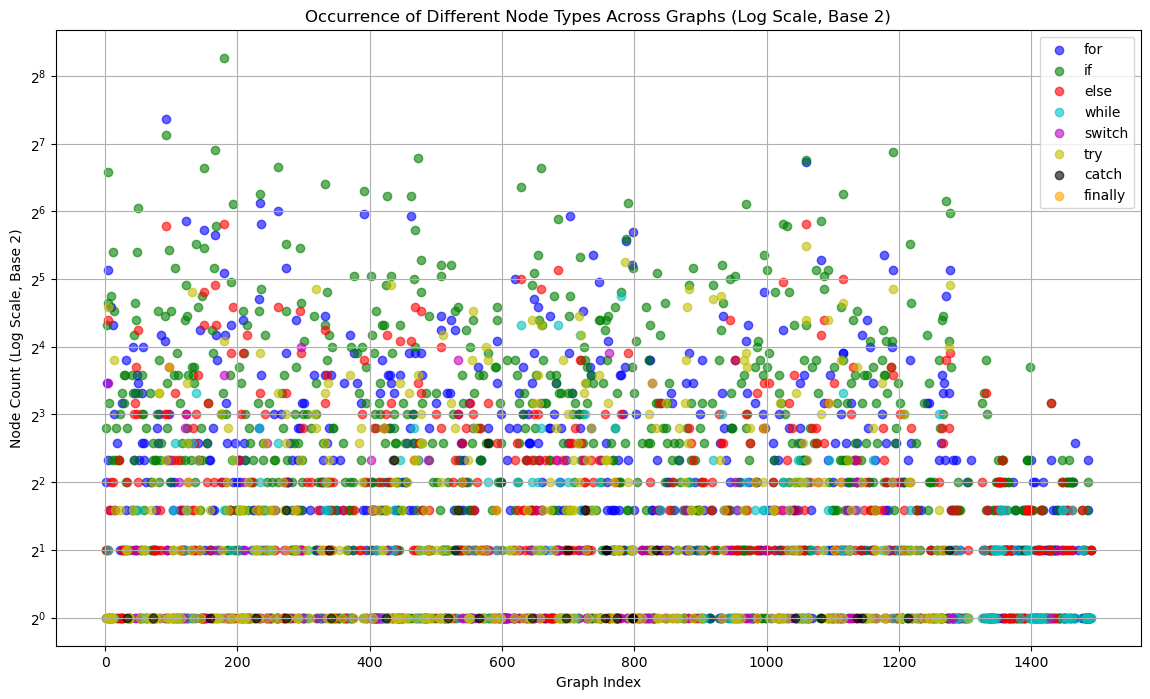

In [23]:
import pickle
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import re

# Load the list of graphs from the file
with open('java_graphs_total.pkl', 'rb') as f:
    graphs = pickle.load(f)

# Define the node types to track
node_types = ['for', 'if', 'else', 'while', 'switch', 'try', 'catch', 'finally']

# Initialize a dictionary to store the occurrences of each node type in each graph
graph_node_counts = {node_type: [] for node_type in node_types}

# Process each graph
for graph_index, graph in enumerate(graphs):
    node_counts = {node_type: 0 for node_type in node_types}
    for node in graph.nodes():
        node_label = graph.nodes[node].get('label', '')
        for node_type in node_types:
            if re.search(node_type, node_label, re.IGNORECASE):
                node_counts[node_type] += 1

    for node_type in node_types:
        graph_node_counts[node_type].append(node_counts[node_type])

# Scatter plot for node label occurrences across graphs
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange']
plt.figure(figsize=(14, 8))

for i, node_type in enumerate(node_types):
    plt.scatter(range(len(graph_node_counts[node_type])), graph_node_counts[node_type],
                color=colors[i % len(colors)], label=node_type, alpha=0.6)

plt.xscale('linear')
plt.yscale('log', base=2)

plt.xlabel('Graph Index')
plt.ylabel('Node Count (Log Scale, Base 2)')
plt.title('Occurrence of Different Node Types Across Graphs (Log Scale, Base 2)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()
